# Exercise 05 Recurrent Neural Networks

In this exercise, you need to follow the requirements of each question to generate the Python code, and the following example is for reference：

- Sample Question: Write a program that takes the user's name as input and prints "Hello, [name]!" where [name] is the user's input.

- Potential Answer:

```python
    name = input("Enter your name: ")
    print("Hello, " + name + "!")
```
- If you enter 'David', the code will output 'Hello, David!', and this will satisfy the requirements.

## Attention
- Generally, there will be multiple answers for one question and you don't have to strictly follow the instructions in the tutorial, as long as you can make the output of the code meet the requirements of the question.
- If possible, strive to make your code concise and avoid excessive reliance on less commonly used libraries.
- You may need to search for information on the Internet to complete the excercise.
- Please answer the questions in order.

## Question 01: The following code are extracted from the tutorial, helping you prepare the data. Copy the following code to run them first and continue finishing the question.


```python
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import math
    import torch
    from torch import nn
    from sklearn.preprocessing import MinMaxScaler
    dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
    dataset = dataframe.values
    timeseries = dataset.astype('float32')
```

### Requirements

- Normolize the dataset and split the training set and the test set by a ratio of 2 to 1.
- Using the `create_dataset` function in the tutorial and set the parameter look_back as 3.
- Generate the train data and test data with the proper shape.

## Write your answer in the following code frame:

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import torch
from torch import nn
from sklearn.preprocessing import MinMaxScaler
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
timeseries = dataset.astype('float32')

In [22]:
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

# a function to generate a dataset of fixed window from a time series. 
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback-2):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 3
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
y_train, y_test = y_train[:, -1, :], y_test[:, -1, :]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([92, 3, 1]) torch.Size([92, 1])
torch.Size([43, 3, 1]) torch.Size([43, 1])


## Question 02: Define a model using `class`, and change the parameters in the LSTM layer.

## Write your answer in the following code frame:

In [23]:
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        # Since we are going to predict t+1, 
        # we extract only the last time step from the model output as prediction.
        x = x[:, -1, :]
        x = self.linear(x)
        return x

## Question 03: Construct your model defined in question 02, then use `Adam` as the optimizer and `MSE` as the loss function. Specify n_epochs to 2000, then train the model using batch size of 16. Observe how they differ from the training results in the tutorial.


## Write your answer in the following code frame:

In [26]:
model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=16)
 
n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 227.1097, test RMSE 428.0347
Epoch 100: train RMSE 197.8430, test RMSE 397.5476
Epoch 200: train RMSE 175.8407, test RMSE 374.2683
Epoch 300: train RMSE 155.2273, test RMSE 352.0021
Epoch 400: train RMSE 136.3676, test RMSE 331.0054
Epoch 500: train RMSE 119.6476, test RMSE 311.5459
Epoch 600: train RMSE 105.0963, test RMSE 293.4525
Epoch 700: train RMSE 92.9195, test RMSE 276.8402
Epoch 800: train RMSE 79.6063, test RMSE 257.7893
Epoch 900: train RMSE 67.4926, test RMSE 239.9106
Epoch 1000: train RMSE 58.4236, test RMSE 224.3635
Epoch 1100: train RMSE 50.8826, test RMSE 210.3445
Epoch 1200: train RMSE 44.7376, test RMSE 200.7519
Epoch 1300: train RMSE 39.4069, test RMSE 184.5337
Epoch 1400: train RMSE 35.2160, test RMSE 171.0943
Epoch 1500: train RMSE 32.2192, test RMSE 160.5294
Epoch 1600: train RMSE 29.7776, test RMSE 151.0500
Epoch 1700: train RMSE 27.9087, test RMSE 142.3918
Epoch 1800: train RMSE 26.4027, test RMSE 134.4345
Epoch 1900: train RMSE 25.2170, test

## Question 03: Plot your prediction and the true data together, and use blue line as the actual data, orange line as the train prediction, green line as the test prediction.


## Write your answer in the following code frame:

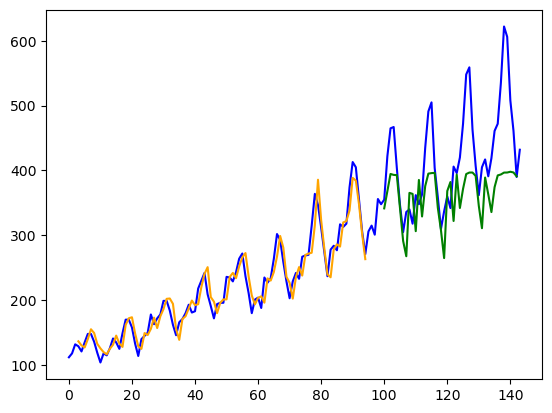

In [33]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
#     y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size - 2] = model(X_train)
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback: len(timeseries)-2] = model(X_test)
# plot
plt.plot(timeseries, c='b')
plt.plot(train_plot, c='orange')
plt.plot(test_plot, c='g')
plt.show()